# TESTING UPROOT

In [6]:
import numpy as np
import pandas as pd
import awkward as ak
import uproot
import matplotlib.pyplot as plt

In [2]:
path = "AO2Dtree.root"
file = uproot.open(path)
file.classnames()

{'DF_2300238590827776;1': 'TDirectory',
 'DF_2300238590827776/O2collision_001;1': 'TTree',
 'DF_2300238590827776/O2filtertrack;1': 'TTree',
 'DF_2300238590827776/O2filtertrackextr;1': 'TTree',
 'DF_2300238590872672;1': 'TDirectory',
 'DF_2300238590872672/O2collision_001;1': 'TTree',
 'DF_2300238590872672/O2filtertrack;1': 'TTree',
 'DF_2300238590872672/O2filtertrackextr;1': 'TTree',
 'DF_2300238590885888;1': 'TDirectory',
 'DF_2300238590885888/O2collision_001;1': 'TTree',
 'DF_2300238590885888/O2filtertrack;1': 'TTree',
 'DF_2300238590885888/O2filtertrackextr;1': 'TTree',
 'DF_2300238590919936;1': 'TDirectory',
 'DF_2300238590919936/O2collision_001;1': 'TTree',
 'DF_2300238590919936/O2filtertrack;1': 'TTree',
 'DF_2300238590919936/O2filtertrackextr;1': 'TTree',
 'DF_2300238590971008;1': 'TDirectory',
 'DF_2300238590971008/O2collision_001;1': 'TTree',
 'DF_2300238590971008/O2filtertrack;1': 'TTree',
 'DF_2300238590971008/O2filtertrackextr;1': 'TTree',
 'DF_2300238590997568;1': 'TDirecto

In [3]:
file["DF_2300238590827776/O2collision_001"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fIndexBCs            | int32_t                  | AsDtype('>i4')
fPosX                | float                    | AsDtype('>f4')
fPosY                | float                    | AsDtype('>f4')
fPosZ                | float                    | AsDtype('>f4')
fCovXX               | float                    | AsDtype('>f4')
fCovXY               | float                    | AsDtype('>f4')
fCovYY               | float                    | AsDtype('>f4')
fCovXZ               | float                    | AsDtype('>f4')
fCovYZ               | float                    | AsDtype('>f4')
fCovZZ               | float                    | AsDtype('>f4')
fFlags               | uint16_t                 | AsDtype('>u2')
fChi2                | float                    | AsDtype('>f4')
fNumContrib          | uint16_t                 | AsDtype(

In [12]:
# careful with this: if there is too much data it might crash: use entry_stop=N to limit the entries loaded
# Also, pandas is the slower than numpy and should be avoided in case of jagged arrays; however it is fancy
print( type(file["DF_2300238590827776/O2collision_001"].arrays(library="pd")) )
file["DF_2300238590827776/O2collision_001"].arrays(library="pd")

<class 'pandas.core.frame.DataFrame'>


,fIndexBCs,fPosX,fPosY,fPosZ,fCovXX,fCovXY,fCovYY,fCovXZ,fCovYZ,fCovZZ,fFlags,fChi2,fNumContrib,fCollisionTime,fCollisionTimeRes
0,2,-0.027438,-0.027783,-4.128410,3.753230e-06,5.601905e-07,2.108514e-06,1.044944e-06,6.980263e-07,3.207475e-06,0,51.125000,26,-0.660344,7.457031
1,11,-0.036509,-0.024888,-9.061310,1.470745e-05,8.127245e-09,1.904368e-05,-3.317371e-06,-1.585484e-05,6.556511e-05,0,1.557617,2,3.174549,257.250000
2,13,-0.032792,-0.022949,-8.386139,4.909933e-06,-1.978129e-06,5.424023e-06,6.817281e-07,-2.011657e-06,5.148351e-06,0,4.046875,6,-0.519399,10.117188
3,18,-0.032568,-0.032371,4.198601,4.486647e-07,3.672903e-08,5.061738e-07,-4.121830e-09,-6.332994e-08,4.605390e-07,0,104.562500,55,-0.129399,2.173828
4,23,-0.037373,-0.029452,1.461815,8.724630e-06,6.001443e-06,1.117587e-05,-3.911555e-07,-7.804483e-07,5.256385e-06,0,5.023438,4,-0.473204,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,65770,-0.028508,-0.026722,4.524841,3.902242e-07,-2.811430e-08,5.955808e-07,1.839362e-08,-1.584413e-07,5.355105e-07,0,78.312500,45,-0.409523,4.601562
12380,65774,-0.030117,-0.030370,4.472672,2.175570e-06,-4.912727e-07,2.536923e-06,-7.817289e-08,-3.499445e-07,1.906417e-06,0,23.875000,15,-0.345562,6.062500
12381,65778,-0.038076,-0.031963,2.403885,1.433305e-06,-3.303867e-07,1.620501e-06,7.974450e-08,3.012829e-07,1.605600e-06,0,34.062500,21,10.894775,86.312500
12382,65783,-0.035579,-0.035610,2.544521,4.492700e-06,4.724134e-07,4.209578e-06,-2.702698e-06,-1.453795e-06,8.299947e-06,0,54.781250,12,-2.988277,160.750000


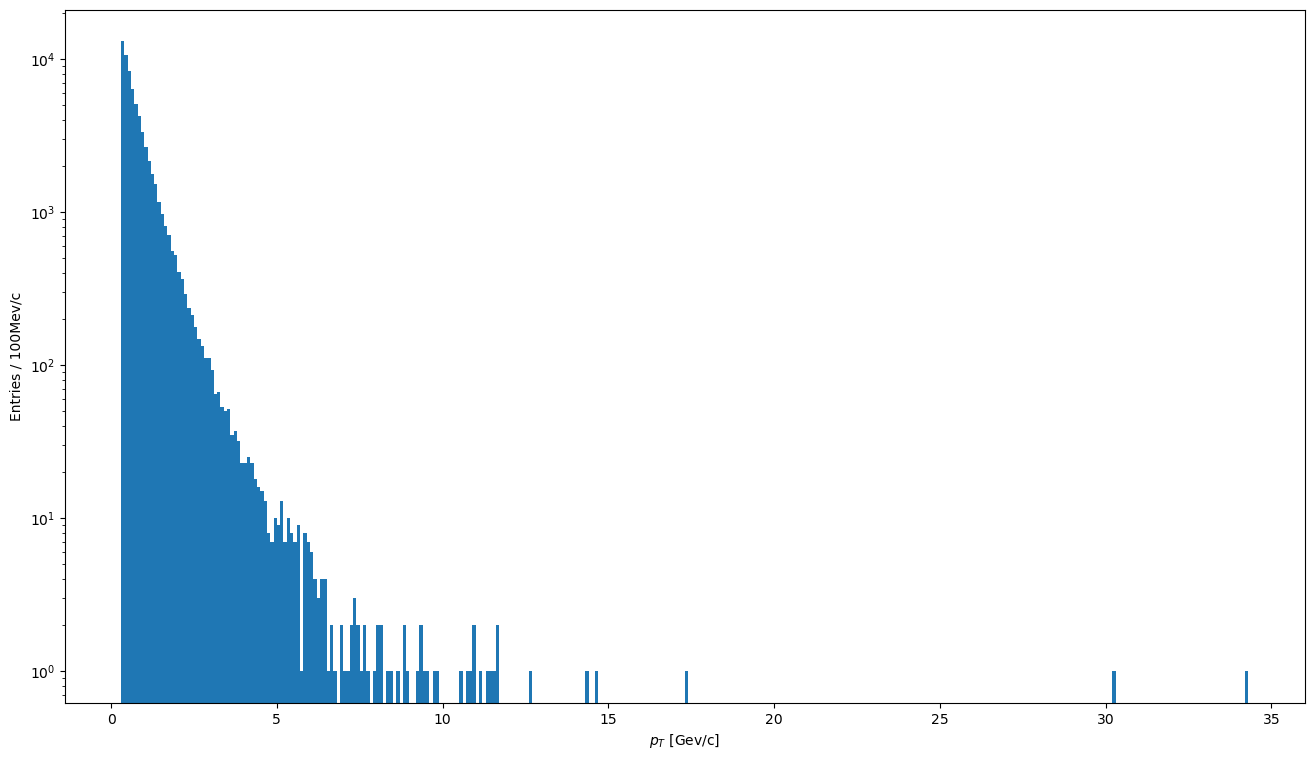

In [8]:
pt = file["DF_2300238590827776/O2filtertrackextr"]["fPt"].array(library="np")
# Wrt the one on the slides: X axis in Gev/c, so binwidth of 100Mev/c is 0.1Gev/c
bin_width = 0.1
bins = np.arange(np.min(pt), np.max(pt) + bin_width, bin_width)
fig, ax = plt.subplots(figsize=(16,9))
plt.hist(pt, bins=bins, log=True)
ax.set_xlabel(r"$p_{T}$ [Gev/c]")
ax.set_ylabel("Entries / 100Mev/c")
plt.show()

